<h1 align="center" style="background-color:DodgerBlue;">Desafío - Dimensionalidad y agrupación (II)</h1>

* Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
* Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
* Desarrollo desafío:
  * El desafío se debe desarrollar de manera Individual.
  * Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Dimensionalidad y agrupación (II)

### Desafío 1: Preparación del ambiente de trabajo.

Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de
carátulas de álbumes.
* Las imágenes se encuentran en una carpeta con el nombre album_covers.
* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg.

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad
finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:

* Comencemos por incluír las librerías clásicas: pandas, numpy y matplotlib.pyplot.
* sklearn.cluster.KMeans: para extraer los principales componentes de una matriz numérica.
* skimage.io: Para poder ingresar y leer imágenes.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings(action="ignore")
import lec7_graphs as gfx
import statsmodels.api  as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io
from colormap import rgb2hex

#### Desafío 2: Importación de imágenes
* Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread. ¿Qué devuelve?

        Devuelve una matriz de valores rgb que representan cada uno de los colores de los pixeles de la imagen

* Para visualizar la imágen en el notebook, ocupe io.imshow.


In [6]:
io.imread('datasets/album_covers/backstreet-boys-millenium.jpg')

array([[[156, 188, 203],
        [174, 210, 224],
        [192, 232, 244],
        ...,
        [194, 231, 237],
        [194, 231, 237],
        [194, 231, 237]],

       [[153, 185, 200],
        [171, 207, 221],
        [190, 230, 242],
        ...,
        [191, 228, 234],
        [193, 230, 236],
        [194, 231, 237]],

       [[150, 183, 200],
        [170, 206, 220],
        [188, 230, 242],
        ...,
        [190, 227, 235],
        [193, 230, 238],
        [196, 233, 241]],

       ...,

       [[152, 213, 198],
        [140, 200, 188],
        [141, 203, 192],
        ...,
        [164, 215, 218],
        [162, 210, 214],
        [170, 215, 220]],

       [[152, 207, 201],
        [140, 197, 190],
        [141, 201, 193],
        ...,
        [160, 211, 214],
        [159, 207, 211],
        [170, 215, 220]],

       [[158, 210, 208],
        [146, 198, 196],
        [148, 203, 200],
        ...,
        [165, 216, 219],
        [169, 217, 221],
        [182, 227, 232]]

In [7]:
imagen = io.imread('datasets/album_covers/backstreet-boys-millenium.jpg')
imagen.shape

(500, 500, 3)

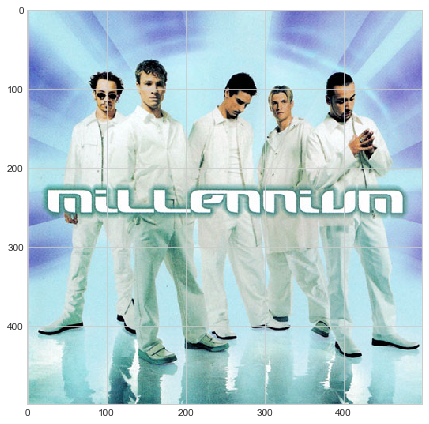

In [8]:
io.imshow('datasets/album_covers/backstreet-boys-millenium.jpg')

#### Desafío 3: Preprocesamiento de imágenes y KMeans

* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante shape.
* Posteriormente redimensionaremos la imágen con reshape.
* Partamos por inicializar nuestro algoritmo KMeans con un k=8, ¿Qué significa esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans. ¿Qué diferencia existe con KMeans?


In [13]:
altura, ancho, canales = imagen.shape

In [14]:
imagen2 = imagen.reshape(altura*ancho, canales)

In [15]:
imagen2.shape

(250000, 3)

In [16]:
imagen2

array([[156, 188, 203],
       [174, 210, 224],
       [192, 232, 244],
       ...,
       [165, 216, 219],
       [169, 217, 221],
       [182, 227, 232]], dtype=uint8)

In [18]:
# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters = 8, random_state = 15820)
# obtenemos los resultados
fit_results_kmeans = kmeans.fit_predict(imagen2)

* Esto significa que instanciamos un objeto kmeans que buscará predetemrinadamente cerrar el ejercicio a 8 clusters (no necesariamente es el determinante)  

In [19]:
# instanciamos MiniBatchKMeans en un nuevo objeto
minikmeans = MiniBatchKMeans(n_clusters = 8, random_state = 15820)
# obtenemos los resultados
fit_results_minik = minikmeans.fit_predict(imagen2)

* Minibatchkmeans es un proceso similar pero con menos costo computacional al iterar en vez de todo el data set, en solo un subconjunto definido de este. Al usar menos recursos,
 también baja la caldad de los clusters encontrados

#### Desafío 4: Extracción de valores

* Ahora extraemos las etiquetas predichas con labels_. Hasta el momento las
* tiquetas hacen referencia a cada centroide. Para imputar sentido en estos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilizamos el atributo cluster_centers_.
* Con las etiquetas, generamos un conteo de ocurrencia con np.unique. Para extraer el conteo, debemos implementar la opción return_counts=True.

In [20]:
kmeans.labels_

array([3, 3, 1, ..., 3, 3, 1])

In [21]:
kmeans.cluster_centers_

array([[143.39270674, 180.78211616, 168.93500049],
       [188.36212859, 229.49877117, 238.34486615],
       [ 20.32646955,  23.5686378 ,  25.99208025],
       [159.34916761, 197.24814555, 223.4656293 ],
       [233.79857757, 240.58201215, 238.63941325],
       [ 91.86844161, 134.10662674, 125.02916287],
       [197.48840732, 210.07715424, 201.30514769],
       [128.84340717, 146.73607714, 210.15666271]])

In [22]:
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([30702, 67927,  5686, 41369, 33662, 15391, 40949, 14314],
       dtype=int64))

In [23]:
minikmeans.labels_

array([6, 0, 0, ..., 0, 0, 0])

In [24]:
minikmeans.cluster_centers_

array([[183.89051122, 226.1937757 , 237.40029474],
       [ 89.01080183, 123.11931865, 113.59900291],
       [175.19978963, 195.5800561 , 183.20642202],
       [ 16.73842551,  19.59466763,  22.25923257],
       [120.00885544, 162.79986717, 169.20518781],
       [209.22682152, 221.29610879, 216.04260969],
       [149.82727181, 182.49419802, 219.51926458],
       [238.43667825, 244.40974006, 243.57276712]])

In [25]:
np.unique(minikmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([74669, 11657, 31048,  5310, 26009, 36614, 38830, 25863],
       dtype=int64))

#### Desafío 5: Conversión rgb a hex
* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.


In [28]:
def hexa(rgb):
        lista_hexa= []
        for i in range(len(rgb)):
                lista_hexa.append(rgb2hex(int(rgb[1][0]), int(rgb[i][1]), int(rgb[i][2])))
        return lista_hexa

In [29]:
#Lista de los valores hexagonales
lista_colores_kmenas = hexa(kmeans.cluster_centers_)
lista_colores_minikmeans = hexa(minikmeans.cluster_centers_)
lista_colores_minikmeans

['#59E2ED',
 '#597B71',
 '#59C3B7',
 '#591316',
 '#59A2A9',
 '#59DDD8',
 '#59B6DB',
 '#59F4F3']

In [30]:
#Lista de counts de kmeans
lista_kmeans= list(np.unique(kmeans.labels_, return_counts = True)[1])
lista_kmeans

[30702, 67927, 5686, 41369, 33662, 15391, 40949, 14314]

In [31]:
#lista de counts de minikmeans
lista_minikmeans= list(np.unique(minikmeans.labels_, return_counts = True)[1])
lista_minikmeans

[74669, 11657, 31048, 5310, 26009, 36614, 38830, 25863]

In [32]:
imagen2.shape[0]

250000

#### Desafío 6: Definición de base

Ahora generamos un DataFrame con las siguientes variables:

* El color hex.
* La ocurrencia del color en cada pixel count.
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_. 

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.


In [33]:
#diccionarios apra despues hacer un df
dicc_kmeans = {'colores': lista_colores_kmenas, 'lista_kmeans': lista_kmeans, 'porcentaje': [i/imagen2.shape[0] for i in lista_kmeans]}
dicc_minikmeans = {'colores': lista_colores_minikmeans, 'lista_kmeans': lista_minikmeans, 'porcentaje': [i/imagen2.shape[0] for i in lista_minikmeans]}

In [34]:
df_kmeans = pd.DataFrame(dicc_kmeans).sort_values(by = ['porcentaje'], ascending = False)
df_kmeans

,colores,lista_kmeans,porcentaje
1,#BCE5EE,67927,0.271708
3,#BCC5DF,41369,0.165476
6,#BCD2C9,40949,0.163796
4,#BCF0EE,33662,0.134648
0,#BCB4A8,30702,0.122808
5,#BC867D,15391,0.061564
7,#BC92D2,14314,0.057256
2,#BC1719,5686,0.022744


In [35]:
df_minikmeans = pd.DataFrame(dicc_minikmeans).sort_values(by=['porcentaje'], ascending = False)
df_minikmeans

,colores,lista_kmeans,porcentaje
0,#59E2ED,74669,0.298676
6,#59B6DB,38830,0.155320
5,#59DDD8,36614,0.146456
2,#59C3B7,31048,0.124192
4,#59A2A9,26009,0.104036
7,#59F4F3,25863,0.103452
1,#597B71,11657,0.046628
3,#591316,5310,0.021240


#### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar coloreadas con el color inferido.

<BarContainer object of 8 artists>

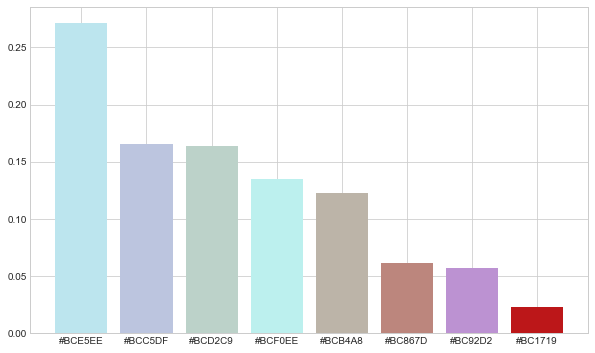

In [36]:
#Gráfico Kmeans
plt.bar(df_kmeans['colores'], df_kmeans['porcentaje'], color = df_kmeans['colores'])

<BarContainer object of 8 artists>

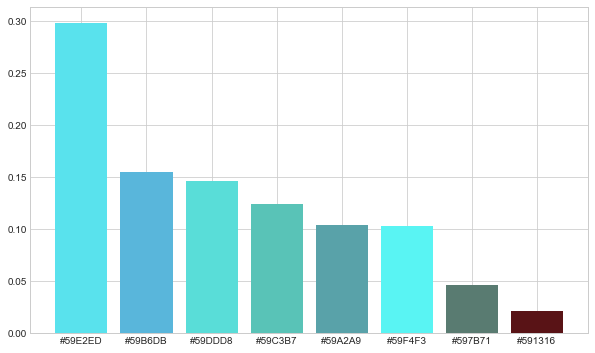

In [37]:
#Gráfico Kmeans
plt.bar(df_minikmeans['colores'], df_minikmeans['porcentaje'], color = df_minikmeans['colores'])